# Let's look for some relationships between the Kickboard and SAT Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import numpy as np
import copy

In [2]:
df = pd.read_csv('1819_SAT_KB_DATA.csv')
df.drop(df.tail(2).index,inplace=True)
df.neg_count = df.neg_count.apply(lambda x: 0 if math.isnan(x) else x)
df

,ID,pos_count,neg_count,SAT_SCORE_1,SAT_SCORE_2
0,304020,71.0,110.0,920.0,960.0
1,2021034,64.0,73.0,1060.0,1270.0
2,30200003,191.0,221.0,980.0,1070.0
3,154738143,237.0,89.0,760.0,920.0
4,302001045,223.0,212.0,1000.0,1090.0
...,...,...,...,...,...
380,701158945,37.0,7.0,710.0,800.0
381,701158954,205.0,68.0,940.0,1060.0
382,701158985,262.0,255.0,NaN,940.0
383,701159059,153.0,83.0,NaN,770.0


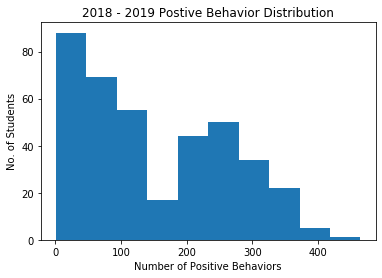

In [3]:
plt.hist(df.pos_count)
plt.title('2018 - 2019 Postive Behavior Distribution')
plt.xlabel('Number of Positive Behaviors')
plt.ylabel('No. of Students')
plt.show()


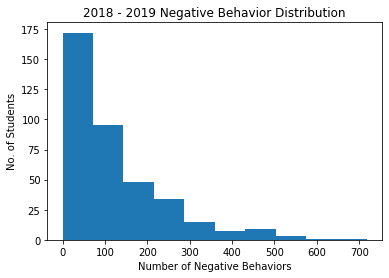

In [4]:
plt.hist(df.neg_count)
plt.title('2018 - 2019 Negative Behavior Distribution')
plt.xlabel('Number of Negative Behaviors')
plt.ylabel('No. of Students')
plt.show()


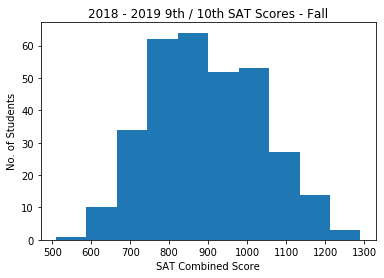

In [5]:
plt.hist(df.SAT_SCORE_1.dropna())
plt.title('2018 - 2019 9th / 10th SAT Scores - Fall')
plt.xlabel('SAT Combined Score')
plt.ylabel('No. of Students')
plt.show()


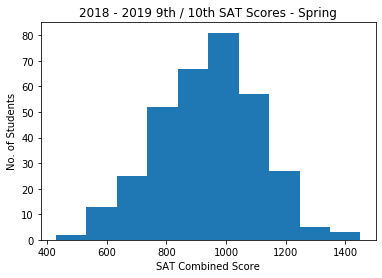

In [6]:
plt.hist(df.SAT_SCORE_2.dropna())
plt.title('2018 - 2019 9th / 10th SAT Scores - Spring')
plt.xlabel('SAT Combined Score')
plt.ylabel('No. of Students')
plt.show()


In [23]:
df_behavior = df[['pos_count','neg_count']]

classifier = KMeans(n_clusters = 3).fit(df_behavior)
classifier.labels_

array([0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2,
       0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0,

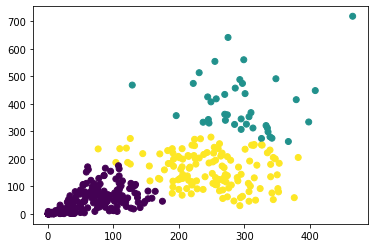

In [24]:
plt.scatter(df.pos_count, df.neg_count, c = classifier.labels_)
plt.show()

In [27]:
df2 = copy.deepcopy(df)
df2.pos_count = df.pos_count.apply(lambda x: 0 if math.isnan(x) else x)
df2.neg_count = df.neg_count.apply(lambda x: 0 if math.isnan(x) else x)
df2 = df2[df2['SAT_SCORE_1'].notna()]
df2_features = df2[['pos_count','neg_count']]
df2_labels = df2['SAT_SCORE_1']
regression = LinearRegression().fit(df2_features, df2_labels)
[m1, m2] = regression.coef_
b = regression.intercept_
regression.score(df2_features, df2_labels)

0.05885407425888167

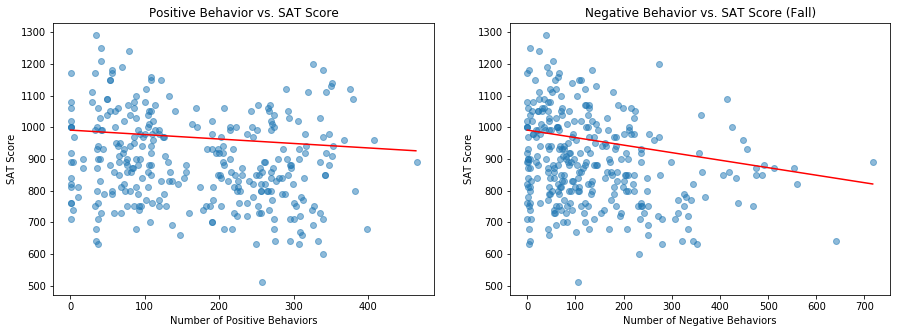

In [19]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df2.pos_count, df2.SAT_SCORE_1, alpha = 0.5)
x1 = range(int(min(df2.pos_count)),int(max(df2.pos_count)))
y1 = [m1*xval + b for xval in x1]
ax1.plot(x1,y1, c = 'red')
ax1.set_xlabel('Number of Positive Behaviors')
ax1.set_ylabel('SAT Score')
ax1.set_title('Positive Behavior vs. SAT Score')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df2.neg_count, df2.SAT_SCORE_1, alpha = 0.5)
x2 = range(int(min(df2.neg_count)),int(max(df2.neg_count)))
y2 = [m2*xval + b for xval in x2]
ax2.plot(x2,y2,c = 'red')
ax2.set_xlabel('Number of Negative Behaviors')
ax2.set_ylabel('SAT Score')
ax2.set_title('Negative Behavior vs. SAT Score (Fall)')

plt.show()

In [28]:
df3 = copy.deepcopy(df)
df3.pos_count = df.pos_count.apply(lambda x: 0 if math.isnan(x) else x)
df3.neg_count = df.neg_count.apply(lambda x: 0 if math.isnan(x) else x)
df3 = df3[df3['SAT_SCORE_2'].notna()]
df3_features = df3[['pos_count','neg_count']]
df3_labels = df3['SAT_SCORE_2']
regression2 = LinearRegression().fit(df3_features, df3_labels)
[m1, m2] = regression2.coef_
b = regression2.intercept_
regression2.score(df3_features, df3_labels)

0.05802752735677574

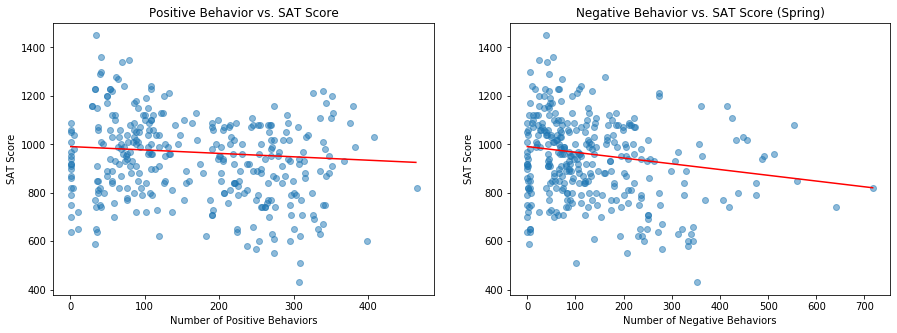

In [29]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(df3.pos_count, df3.SAT_SCORE_2, alpha = 0.5)
x1 = range(int(min(df2.pos_count)),int(max(df2.pos_count)))
y1 = [m1*xval + b for xval in x1]
ax1.plot(x1,y1, c = 'red')
ax1.set_xlabel('Number of Positive Behaviors')
ax1.set_ylabel('SAT Score')
ax1.set_title('Positive Behavior vs. SAT Score')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(df3.neg_count, df3.SAT_SCORE_2, alpha = 0.5)
x2 = range(int(min(df2.neg_count)),int(max(df2.neg_count)))
y2 = [m2*xval + b for xval in x2]
ax2.plot(x2,y2,c = 'red')
ax2.set_xlabel('Number of Negative Behaviors')
ax2.set_ylabel('SAT Score')
ax2.set_title('Negative Behavior vs. SAT Score (Spring)')

plt.show()

In [11]:
pos_neg_df = pd.read_csv('Neg_Pos_Comparison.csv')
pos_neg_df.drop(pos_neg_df.tail(2).index,inplace=True)
pos_neg_df.head()


,Staff,pos_net,neg_net,Net,pos_neg_ratio
0,Student South,595.0,NaN,NaN,NaN
1,Student Anderson,110.0,-589.0,-479.0,0.186757
2,Student Ballard,9.0,-47.0,-38.0,0.191489
3,Student Schrag,12.0,-46.0,-34.0,0.260870
4,Student2 Anderson,257.0,-880.0,-623.0,0.292045


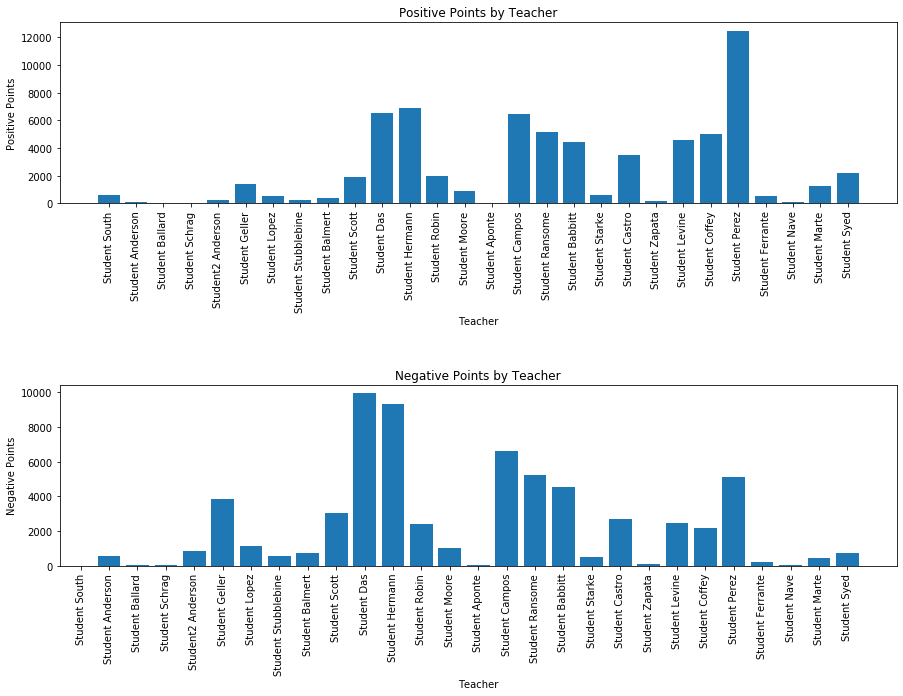

In [12]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,1,1)
ax1.bar(pos_neg_df.Staff, pos_neg_df.pos_net)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_xlabel('Teacher')
ax1.set_ylabel('Positive Points')
ax1.set_title('Positive Points by Teacher')

ax2 = fig.add_subplot(2,1,2)
ax2.bar(pos_neg_df.Staff, abs(pos_neg_df.neg_net))
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.set_xlabel('Teacher')
ax2.set_ylabel('Negative Points')
ax2.set_title('Negative Points by Teacher')

plt.subplots_adjust(hspace = 1.0)
plt.show()

Text(0.5, 1.0, 'Postive to Negative Points Ratio by Teacher')

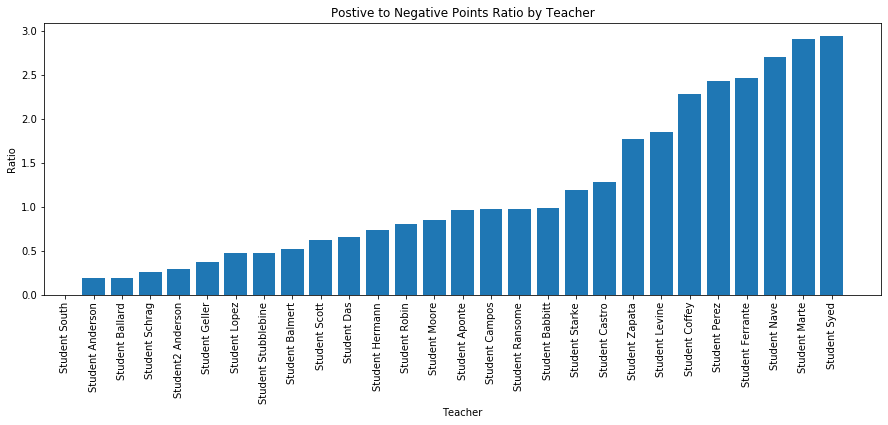

In [13]:
fig3 = plt.figure(figsize = (15,5))

ax1 = fig3.add_subplot(1,1,1)
ax1.bar(pos_neg_df.Staff, pos_neg_df.pos_neg_ratio)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.set_xlabel('Teacher')
ax1.set_ylabel('Ratio')
ax1.set_title('Postive to Negative Points Ratio by Teacher')